# EDA - Exploratory Data Analysis
### Loan Credit Data

In [201]:
# Importing necessary modules

import sklearn
import numpy as np
import pandas as pd
import statsmodels 
import seaborn as sns
import matplotlib

from matplotlib import pyplot as plt
import pylab
from pylab import plot,show
from pylab import legend,title,xlabel,ylabel



# Reading and Understanding Data

In [202]:
app_data = pd.read_csv("application_data (1).csv")

In [203]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Using describe columns to check the mean, median, mode and other quantile values

In [204]:
app_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [205]:
app_data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


# Checking Null Values

Here we are checking the count of null values in every column

In [206]:
null_values = app_data.isnull().sum()
print(null_values[0:30])

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

# Finding the percentage of NULL values in the whole data frame

In [207]:
# Percentage of null values in the data
total_cells = np.product(app_data.shape)

total_missing = null_values.sum()

(total_missing/total_cells)*100

24.39594190712943

We got 24.4 % NULL values in the complete data frame, thus we need to treat these null values.

# Creating a function to calculate % Null values in every column

In [208]:
def null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

Calulating Null % for columns in Application Data

In [209]:
Na_col = null_percentage(app_data)
print(Na_col)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64


# Columns with more than 50 % Null Values

We need to drop the columns with more than 50% null values 

In [210]:
Na_col = Na_col[Na_col>50]
print(Na_col)

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

# Plotting null percentage against columns

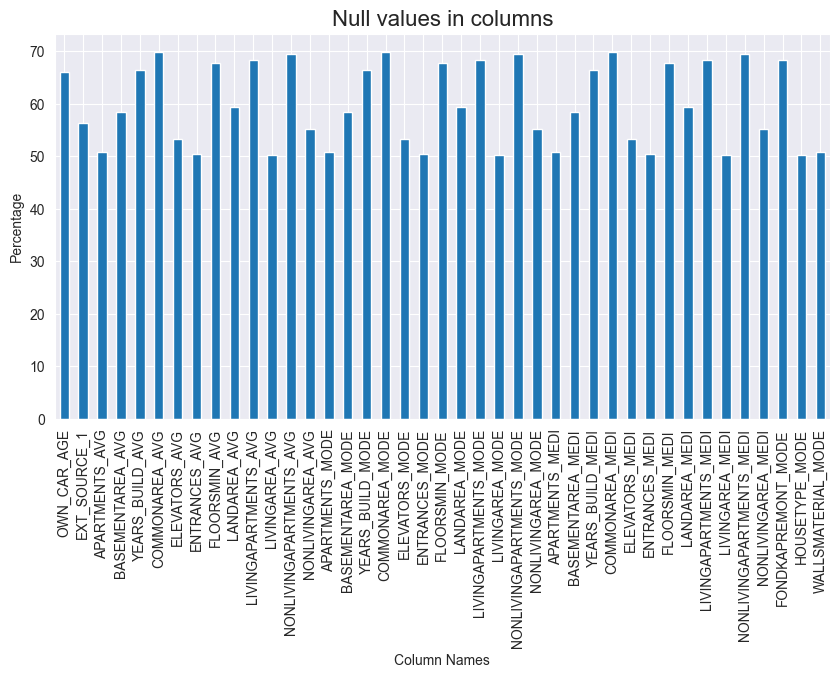

In [211]:
plt.figure(figsize=(10, 5), dpi=100)
Na_col.plot(kind="bar",x='column_name',y='null_percentage')
plt.title("Null values in columns")
plt.xlabel('Column Names')
plt.ylabel('Percentage')
plt.show()

# Dropping Columns with Null values more than 50%

In [212]:
app_data_filtered = app_data.drop(Na_col.index,axis=1)

 Checking filtered data

In [213]:
app_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

# Checking unique values in the columns to be able to differentiate the categorical and continuous data

In [214]:
app_data_filtered.nunique().sort_values(ascending=False)


SK_ID_CURR            307511
EXT_SOURCE_2          119831
DAYS_BIRTH             17460
DAYS_REGISTRATION      15688
AMT_ANNUITY            13672
                       ...  
FLAG_OWN_CAR               2
FLAG_DOCUMENT_2            2
FLAG_DOCUMENT_3            2
FLAG_DOCUMENT_4            2
NAME_CONTRACT_TYPE         2
Length: 81, dtype: int64

### Checking number of columns and rows after removing NULL columns

In [215]:
print(app_data_filtered.shape)

(307511, 81)


# Finding the Correlation

In [216]:
app_data_filtered.corr()

C:\Users\EXC FA1TH\AppData\Local\Temp\ipykernel_11964\2518683062.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  app_data_filtered.corr()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


# Selecting Columns which are necessary for analysis

We have selected the columns based on 
- the null percentage
- the correlation factor
- logical significance of the column.

In [217]:
new_df = app_data_filtered[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
               'CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
               'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
               'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED',
               'OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY',
               'ORGANIZATION_TYPE','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
               'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_YEAR']]

new_df is now our final dataframe out of which no other column can be removed for better analysis

In [218]:
new_df.shape

(307511, 33)

Counting null values

In [219]:
new_df.isna().sum()


SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                     660
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
D

# Calculating null percentage

In [220]:
null_percentage_final = null_percentage(new_df)
null_percentage_final

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT_W_CITY     0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
D

### We have OCCUPATION_TYPE and AMT_REQ_CREDIT_BUREAU_YEAR where the null percentage is still significant

We still need to treat this data, thus we will replace the null values


### Now the question arises, with what we should fill the data, lets check out the mean, median for the AMT_REQ_CREDIT_BUREAU_YEAR column

In [221]:
np.mean(new_df['AMT_REQ_CREDIT_BUREAU_YEAR'])

1.899974435321363

In [222]:
np.median(new_df['AMT_REQ_CREDIT_BUREAU_YEAR'])

nan

Mean and median cannot be filled in the columns as it can affect the data, since it is categorical.

In [223]:
new_df[['OCCUPATION_TYPE','AMT_REQ_CREDIT_BUREAU_YEAR']]

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,Laborers,1.0
1,Core staff,0.0
2,Laborers,0.0
3,Laborers,NaN
4,Core staff,0.0
...,...,...
307506,Sales staff,NaN
307507,NaN,NaN
307508,Managers,1.0
307509,Laborers,0.0


### We will be using forward fill to fill the null values in the new_df

In [224]:
new_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(method = 'ffill', inplace = True)

C:\Users\EXC FA1TH\AppData\Local\Temp\ipykernel_11964\1492413860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(method = 'ffill', inplace = True)


In [225]:
# Checking null percentage
null_percentage_final = null_percentage(new_df)
null_percentage_final

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT_W_CITY     0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
D

Here still we have OCCUPATION_TYPE with higher null percentage ~ 33%
- OCCUPATION_TYPE = NULL comprises majority of the data, we cannot drop the data
- We cannot fill any value as it will create a bias in the data. 

Thus we replace the null values with 'Unknown'


In [226]:
new_df['OCCUPATION_TYPE'].fillna(value=  'Unknown', inplace = True)

C:\Users\EXC FA1TH\AppData\Local\Temp\ipykernel_11964\2682654357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['OCCUPATION_TYPE'].fillna(value=  'Unknown', inplace = True)


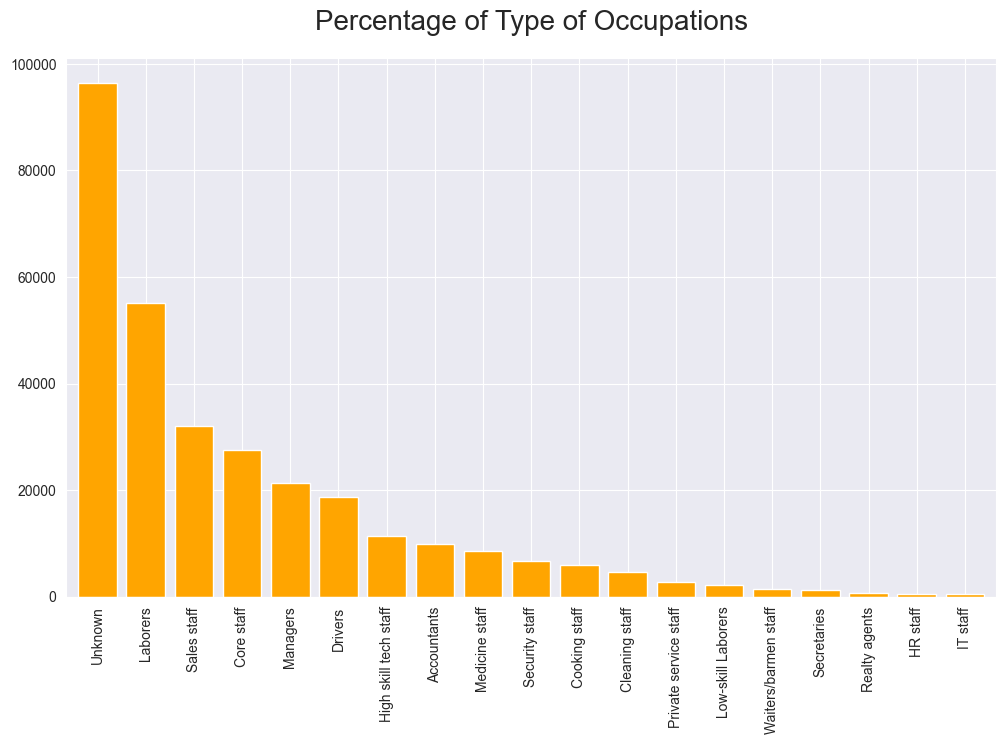

In [227]:
plt.figure(figsize = [12,7])
(new_df["OCCUPATION_TYPE"].value_counts()).plot.bar(color= "orange",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

In [228]:
null_percentage_final = null_percentage(new_df)
null_percentage_final

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT_W_CITY    0.00
ORGANIZATION_TYPE              0.00
EXT_SOURCE_2                   0.21
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE    

## DAYS_BIRTH is in negative days. Thus we first convert it into positive value and divide by 365 to get the age in years

In [229]:
new_df['DAYS_BIRTH'] = (round(new_df['DAYS_BIRTH'].abs()//365,2)).astype(int)
new_df['DAYS_BIRTH']

C:\Users\EXC FA1TH\AppData\Local\Temp\ipykernel_11964\693017948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DAYS_BIRTH'] = (round(new_df['DAYS_BIRTH'].abs()//365,2)).astype(int)


0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int32

## Creating bins to categorise the age in various categories as defined

In [230]:
new_df['DAYS_BIRTH'] = pd.cut(x=new_df['DAYS_BIRTH'],
                      bins=[0,20,30,40,50,60,100],
                             labels=['0-20','21-30','31-40','41-50','51-60','61-100']
                    )

C:\Users\EXC FA1TH\AppData\Local\Temp\ipykernel_11964\649628900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DAYS_BIRTH'] = pd.cut(x=new_df['DAYS_BIRTH'],


In [231]:
new_df['DAYS_BIRTH']

0         21-30
1         41-50
2         51-60
3         51-60
4         51-60
          ...  
307506    21-30
307507    51-60
307508    41-50
307509    31-40
307510    41-50
Name: DAYS_BIRTH, Length: 307511, dtype: category
Categories (6, object): ['0-20' < '21-30' < '31-40' < '41-50' < '51-60' < '61-100']

<Axes: xlabel='DAYS_BIRTH', ylabel='count'>

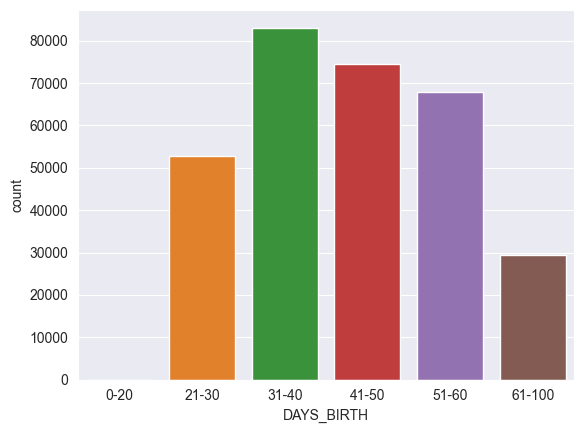

In [232]:
sns.countplot(x='DAYS_BIRTH',data=new_df)

# As we can see the count of applications are the highest from the age category 31-40 yrs

In [233]:
# Calculating gender count
new_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

## Count plot for number of people according to the gender

<Axes: xlabel='CODE_GENDER', ylabel='count'>

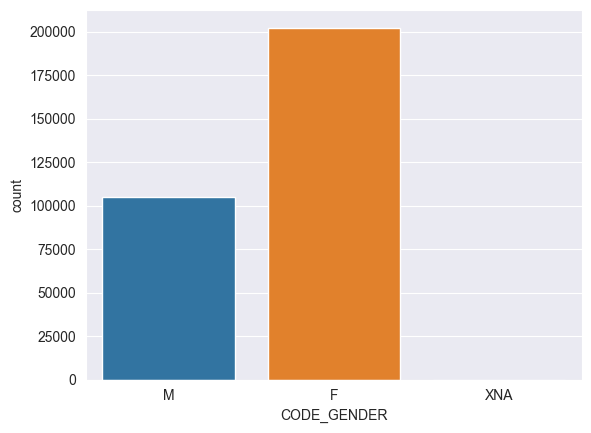

In [234]:
sns.countplot(x='CODE_GENDER',data=new_df)

## DAYS_EMPLOYED is in negative days. Thus we first convert it into positive value and divide by 365 to get the experience in years

In [235]:
new_df['DAYS_EMPLOYED'] = (round(new_df['DAYS_EMPLOYED'].abs()//365,2)).astype(int)
new_df['DAYS_EMPLOYED']

C:\Users\EXC FA1TH\AppData\Local\Temp\ipykernel_11964\872381682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DAYS_EMPLOYED'] = (round(new_df['DAYS_EMPLOYED'].abs()//365,2)).astype(int)


0            1
1            3
2            0
3            8
4            8
          ... 
307506       0
307507    1000
307508      21
307509      13
307510       3
Name: DAYS_EMPLOYED, Length: 307511, dtype: int32

In [236]:
new_df.iloc[np.where(new_df['DAYS_EMPLOYED']>45)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0.205747,1.0,0.0,1.0,0.0,0,1,0,0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0.555183,0.0,0.0,0.0,0.0,0,0,0,0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0.624305,0.0,0.0,0.0,0.0,0,0,0,0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0.650765,0.0,0.0,0.0,0.0,0,1,0,0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0.766138,0.0,0.0,0.0,0.0,0,1,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0.195625,11.0,2.0,11.0,0.0,0,1,0,0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0.589906,1.0,1.0,1.0,1.0,0,0,0,0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0.307082,0.0,0.0,0.0,0.0,0,1,0,0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0.346391,0.0,0.0,0.0,0.0,0,0,0,0,0.0


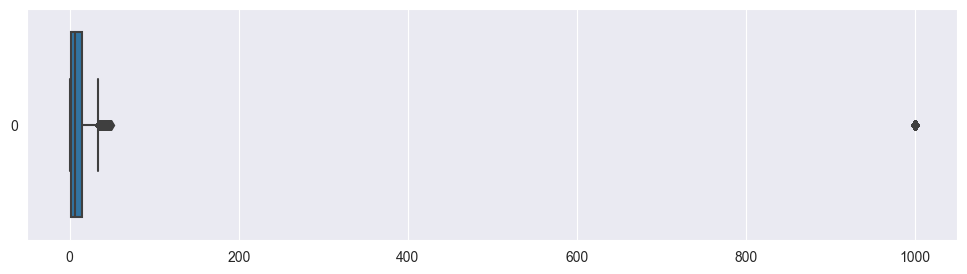

In [276]:
plt.figure(figsize = (12,3))
sns.boxplot(new_df['DAYS_EMPLOYED'],orient='h')
plt.show()

## If we see the box plot of the experience in years, we can see there are around ~55k records where the experience is in 1000 years, which is significantly . 
### This data is of either unemployed individuals or pensioners

In [238]:
# Unemployed count
new_df.iloc[np.where(new_df['NAME_INCOME_TYPE']=='Unemployed')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR
1156,101358,0,Revolving loans,F,N,N,0,337500.0,585000.0,29250.0,...,0.105875,NaN,NaN,NaN,NaN,0,0,0,0,0.0
3937,104600,0,Revolving loans,F,N,Y,2,135000.0,270000.0,13500.0,...,0.617056,2.0,0.0,2.0,0.0,0,0,0,0,2.0
23834,127729,1,Cash loans,F,N,Y,0,99000.0,783000.0,22306.5,...,0.006939,0.0,0.0,0.0,0.0,0,0,0,0,2.0
35352,140949,0,Cash loans,F,N,N,0,56250.0,1530000.0,54954.0,...,0.585243,3.0,0.0,2.0,0.0,0,0,0,0,0.0
37512,143454,1,Cash loans,M,Y,Y,0,31500.0,585000.0,26892.0,...,0.276265,0.0,0.0,0.0,0.0,0,0,0,0,1.0
41723,148306,0,Revolving loans,F,N,Y,0,270000.0,135000.0,6750.0,...,0.600470,0.0,0.0,0.0,0.0,0,0,0,0,7.0
77179,189489,0,Cash loans,F,N,N,1,54000.0,634500.0,23643.0,...,0.647398,0.0,0.0,0.0,0.0,0,0,0,0,2.0
78336,190812,1,Cash loans,F,N,Y,0,45000.0,328500.0,10629.0,...,0.428753,0.0,0.0,0.0,0.0,0,0,0,0,2.0
80704,193571,1,Cash loans,F,N,Y,0,90000.0,571500.0,20524.5,...,0.698729,3.0,2.0,3.0,2.0,0,0,0,0,4.0
92061,206901,0,Revolving loans,M,Y,Y,0,270000.0,855000.0,42750.0,...,0.399796,NaN,NaN,NaN,NaN,0,0,0,0,0.0


## We have 22 records of unemployed individuals. Thus the rest we conclude as penbsioners. We do not delete/replace anything.

--------------------------------------------------------

# Analysing Children Count 

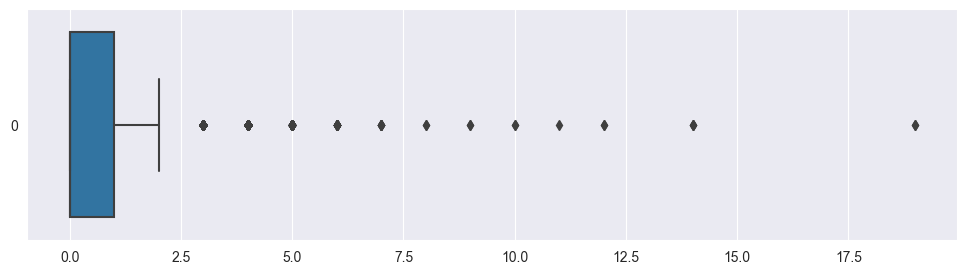

In [239]:
plt.figure(figsize = (12,3))
sns.boxplot(new_df['CNT_CHILDREN'],orient='h')
plt.show()

### WE have outliers in the CNT_CHILDREN column1st quartile is missing for CNT_CHILDREN which means most of the data are present in the 1st quartile.

In [279]:
# Remove all data points where CNT_CHILDREN is greater than 7
new_df = new_df[new_df['CNT_CHILDREN']<=7]
new_df.shape[0] 

307497

In [240]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

--------------------------------------------------------

# Analysing average income by gender

<Axes: xlabel='CODE_GENDER', ylabel='AMT_INCOME_TOTAL'>

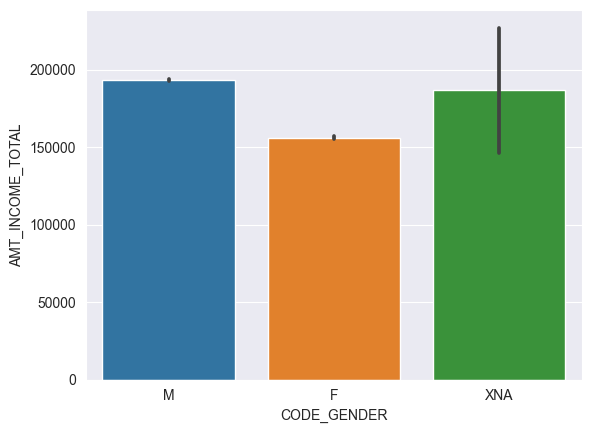

In [241]:
#Average Income
sns.barplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL',data=new_df)

### The average income of Male individuals is higher than the others

--------------------------------------------------------

# Analysing AMT_GOODS_PRICE

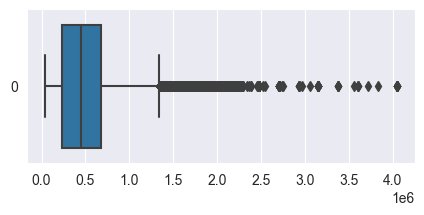

In [242]:
plt.figure(figsize=(5,2))
sns.boxplot(new_df['AMT_GOODS_PRICE'],orient='h')
plt.show()

Observation from Boxplot:
- For 'AMT_GOODS_PRICE' outlier present in the data. so need to impute with median value: 4

--------------------------------------------------------

# Analysis for NAME_TYPE_SUITE

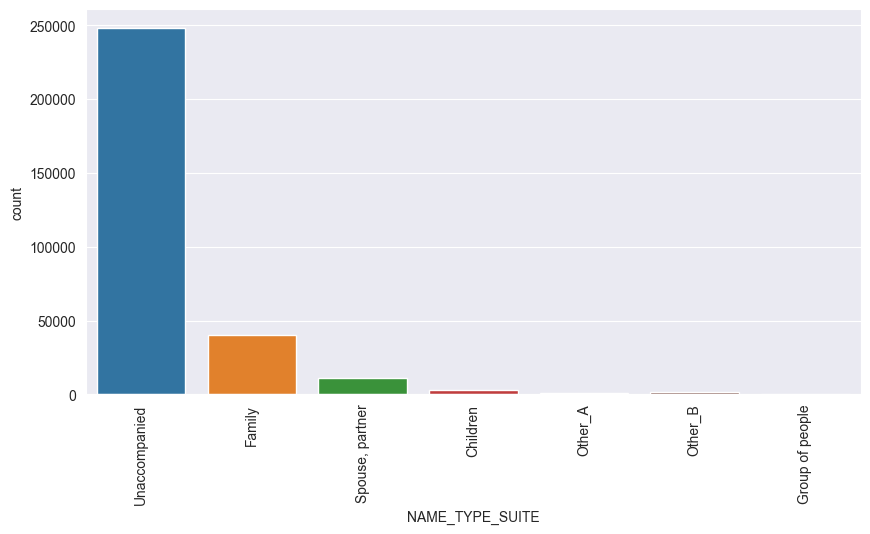

In [243]:
plt.figure(figsize = (10,5))
sns.countplot(data = new_df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

### The count of unaccompanied individuals is very high in the application data. Thus we can conclude that there are more loaners who are not accompanied.

--------------------------------------------------------

# Analysis for EXT_SOURCE_2

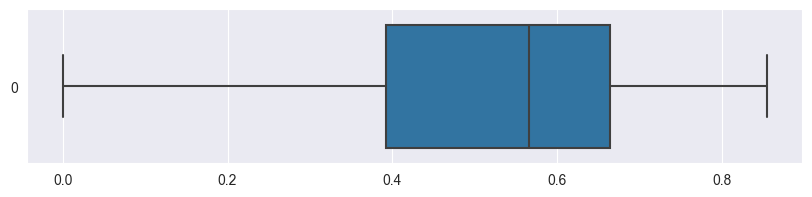

In [244]:
plt.figure(figsize=(10,2))
sns.boxplot(new_df['EXT_SOURCE_2'],orient='h')
plt.show()

### For 'EXT_SOURCE_2' no outliers present. So data is rightly present.


--------------------------------------------------------

# Analysis for AMT_INCOME_TOTAL

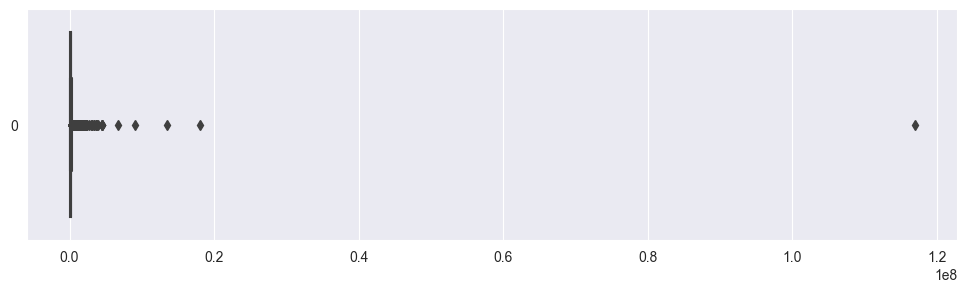

In [246]:
plt.figure(figsize = (12,3))
sns.boxplot(new_df['AMT_INCOME_TOTAL'],orient='h')
plt.show()

### In AMT_INCOME_TOTAL only single high value data point is present as outlier


--------------------------------------------------------

# Analysis for AMT_ANNUITY

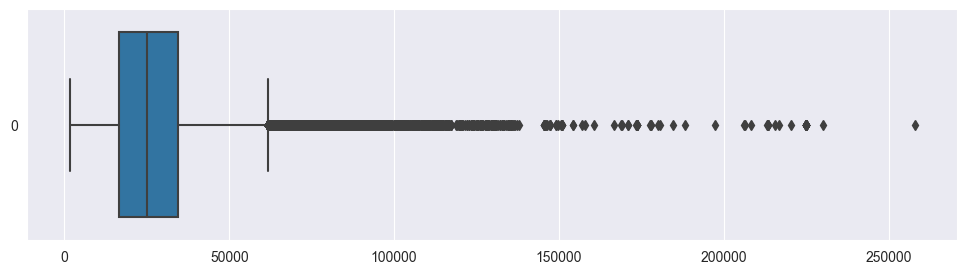

In [247]:
plt.figure(figsize = (12,3))
sns.boxplot(new_df['AMT_ANNUITY'],orient='h')
plt.show()

### 1st quartiles and 3rd quartile for AMT_ANNUITY is moved towards first quartile.


--------------------------------------------------------

# Dividing the dataset into two dataset of Target=1(client with payment difficulties) and Target=0(all other)

In [249]:
Target0 = new_df.loc[new_df.TARGET == 0]
Target1 = new_df.loc[new_df.TARGET == 1]

In [250]:
Imb = round(len(Target0)/len(Target1),2)

print('Imbalance Ratio:', Imb)

Imbalance Ratio: 11.39


# Univariate

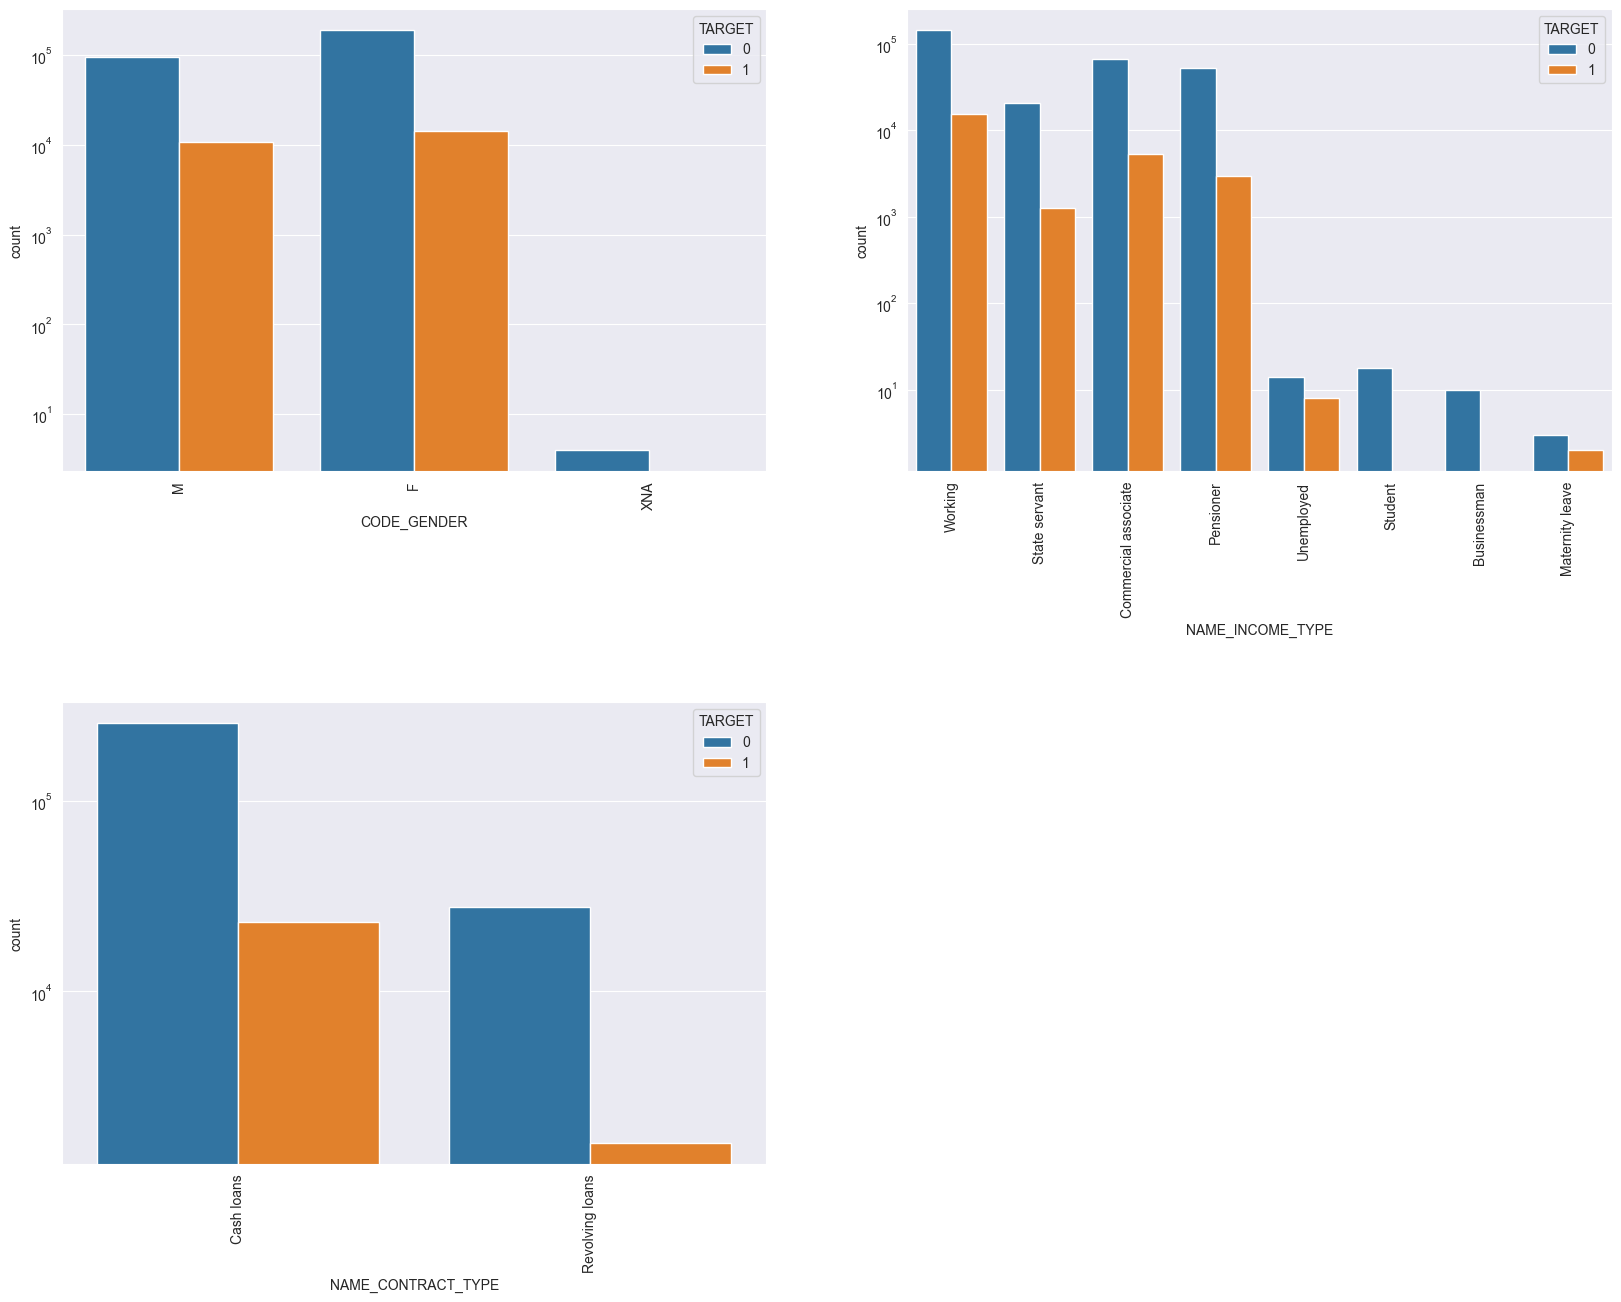

In [252]:
flow = ['CODE_GENDER', 'NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (20, 15))

for i in enumerate(flow):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = new_df)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 90)
    plt.yscale('log')

CODE_GENDER:

- The % of defaulters are more in Male than Female

NAME_INCOME_TYPE:

- Student and business are higher in percentage of loan repayment.
- Working, State servent and Commercial associates are higher in default percentage.
- Maternity category is significantly higher problem in repayment.

NAME_CONTRACT_TYPE

- For contract type ‘Cash loans’ are high in number of credits than ‘Revolving loans’ contract type.
- By above graph 'Revolving loans' is small amount compared to ‘Cash loans’ 

# Correlation

In [253]:
corr_df1 = Target0.select_dtypes(include=["int64","float64"]).corr()
corr_df0 = Target1.select_dtypes(include=["int64","float64"]).corr()

## Top 10 Infuencing factors

In [254]:
#taking top 10 influencing factors

cdf1= corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False)

for i in range(0,20,2):
    print(cdf1[[i]])

AMT_CREDIT  AMT_GOODS_PRICE    0.98725
dtype: float64
CNT_CHILDREN  CNT_FAM_MEMBERS    0.878571
dtype: float64
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.859332
dtype: float64
AMT_ANNUITY  AMT_GOODS_PRICE    0.776686
dtype: float64
AMT_CREDIT  AMT_ANNUITY    0.771309
dtype: float64
AMT_ANNUITY  AMT_INCOME_TOTAL    0.418953
dtype: float64
AMT_GOODS_PRICE  AMT_INCOME_TOTAL    0.349462
dtype: float64
AMT_INCOME_TOTAL  AMT_CREDIT    0.342799
dtype: float64
OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.331336
dtype: float64
DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.329206
dtype: float64


## Top 10 Infuencing factors

In [255]:
#taking top 10 influencing factors

cdf0 = corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False)

for i in range(0,20,2):
    print(cdf0[[i]])

AMT_GOODS_PRICE  AMT_CREDIT    0.983103
dtype: float64
CNT_CHILDREN  CNT_FAM_MEMBERS    0.885484
dtype: float64
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.868994
dtype: float64
AMT_ANNUITY  AMT_GOODS_PRICE    0.752699
dtype: float64
AMT_CREDIT  AMT_ANNUITY    0.752195
dtype: float64
OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.337181
dtype: float64
DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.333825
dtype: float64
OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.264159
dtype: float64
OBS_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.261009
dtype: float64
EXT_SOURCE_2  REGION_POPULATION_RELATIVE    0.169751
dtype: float64


---------------------------------------------

# Bivariate

### Education Type VS Credit Amount (Payment / Non Payment Difficulties) for Target0

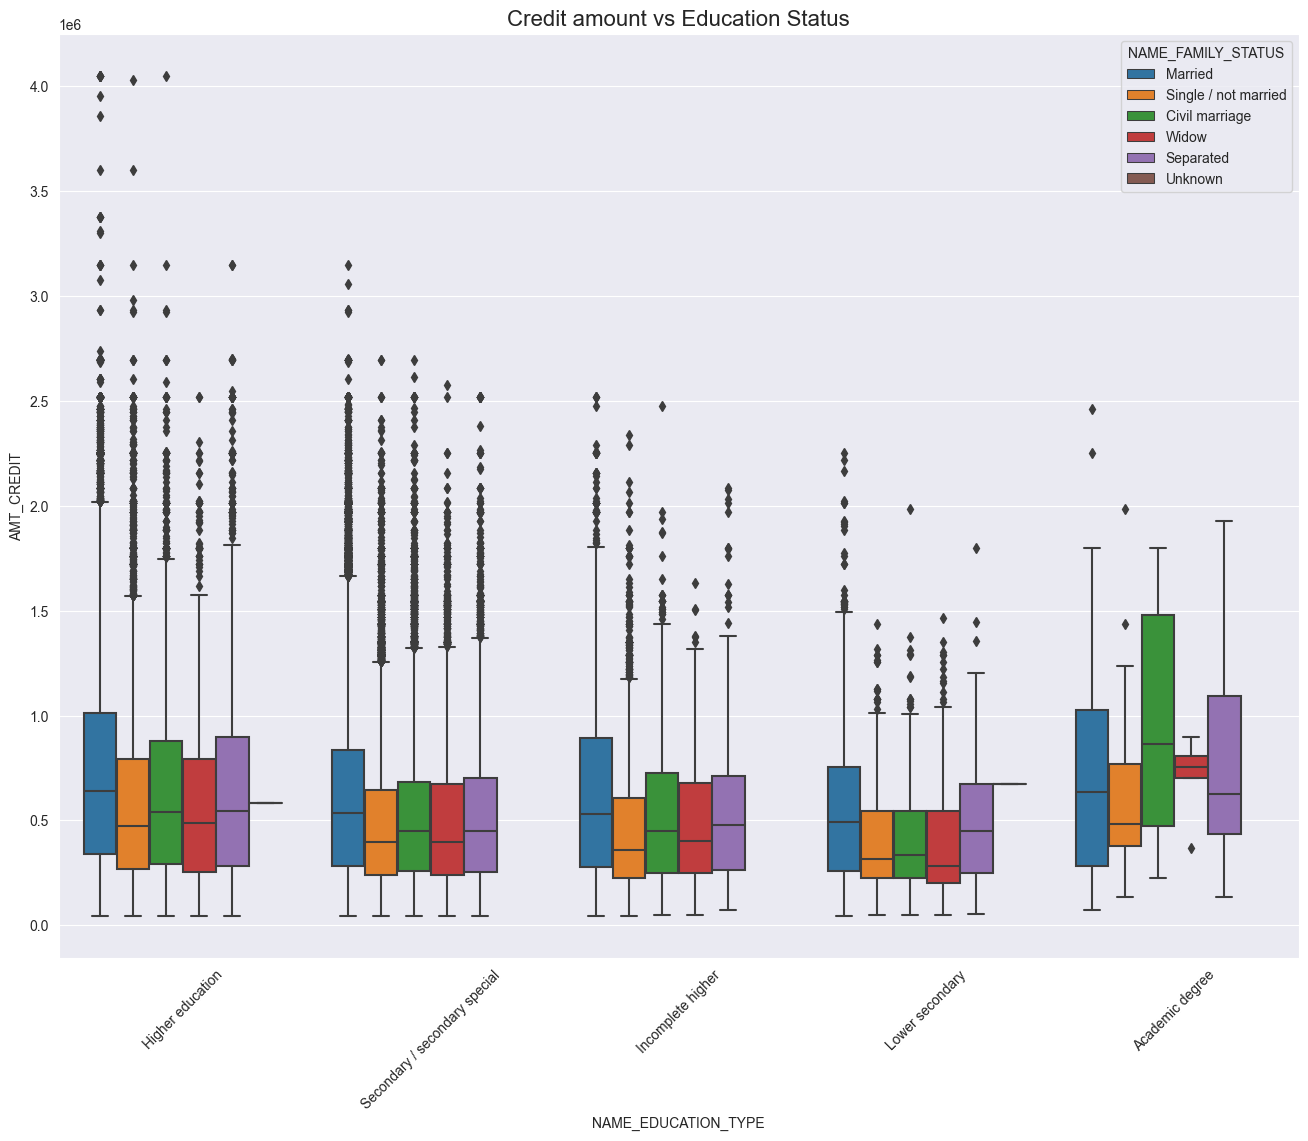

In [256]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

## Observation - Target 0
- Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

--------------------

### Education Type VS Credit Amount (Payment / Non Payment Difficulties) for Target1

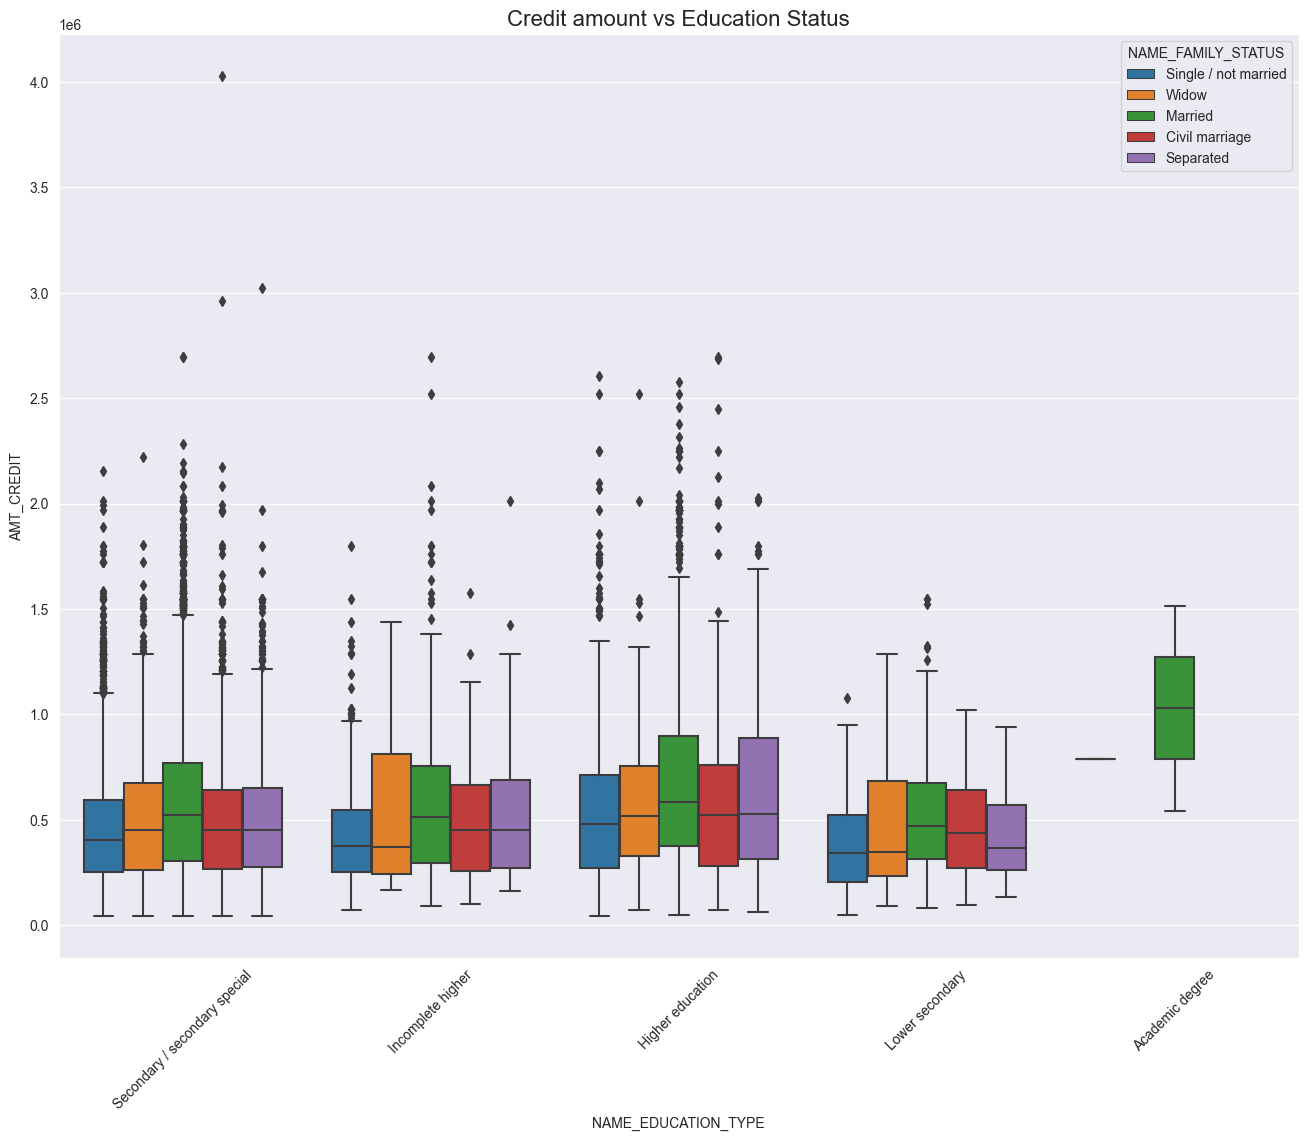

In [257]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

## Observation 
- Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile

------------------

## Income VS Credit Amount (Payment / Non Payment Difficulties) for target0

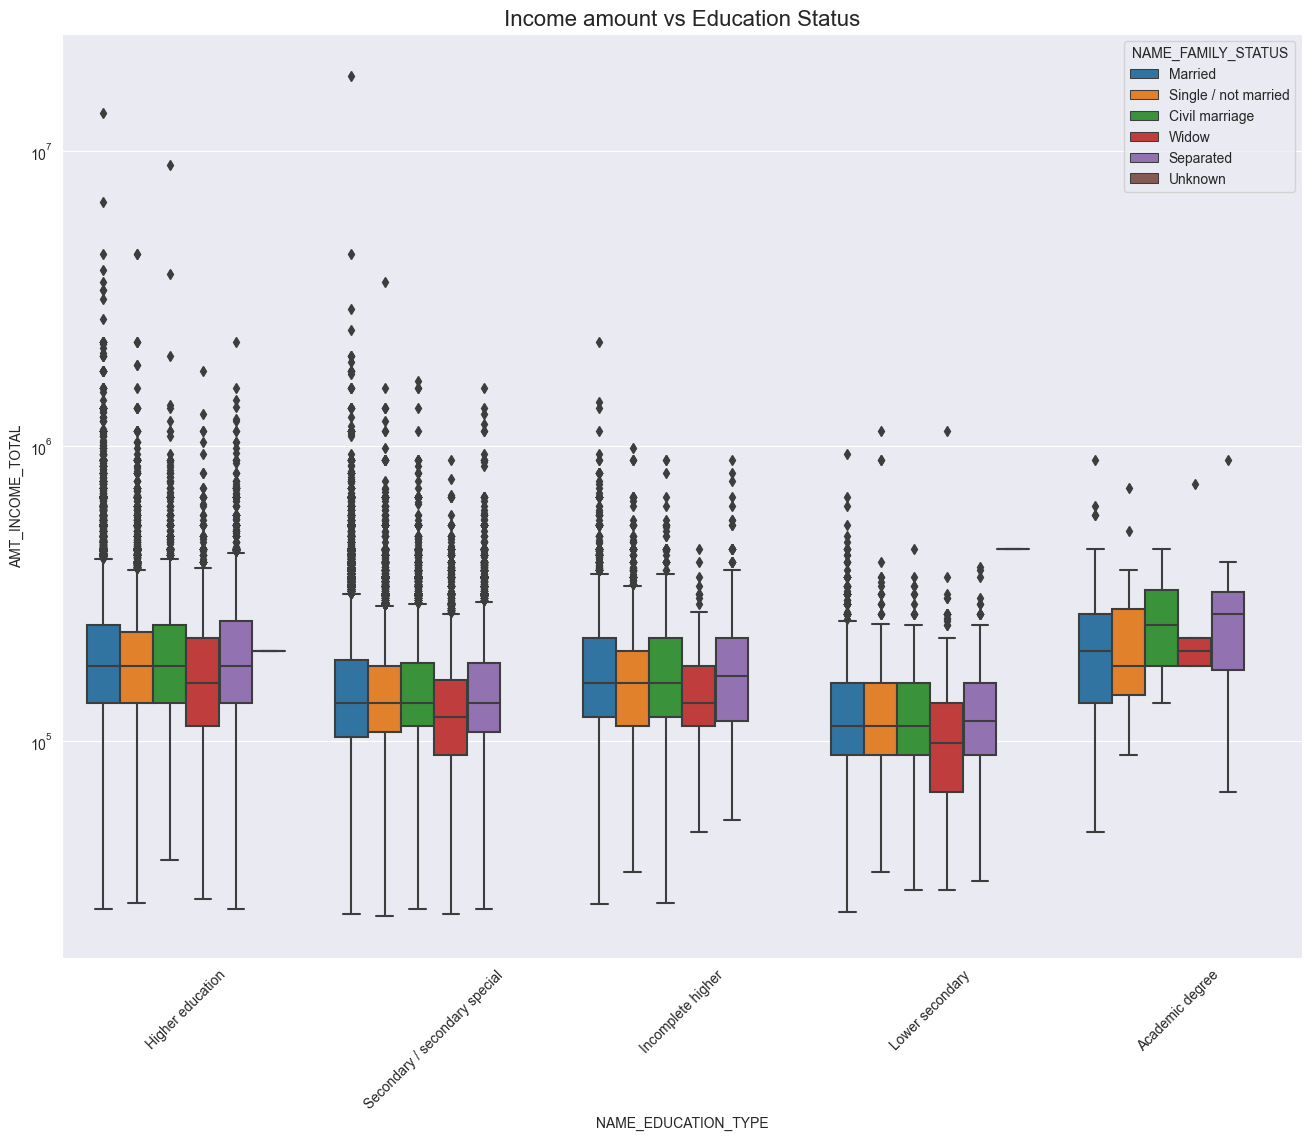

In [258]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

## Observation
- Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

--------------

# Previous Application Data

In [260]:
prev_data = pd.read_csv("previous_application.csv")
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [262]:
prev_data.shape

(1670214, 37)

## Checking null values

In [263]:
null_values = prev_data.isnull().sum()
print(null_values[0:30])

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### Calculating Null percentage

In [264]:
Nu_col = null_percentage(prev_data)
Nu_col


SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [265]:
Nu_col = Nu_col[Nu_col<50]
Nu_col

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [266]:
prev_df = prev_data[['SK_ID_PREV',
'SK_ID_CURR',
'NAME_CONTRACT_TYPE',
'AMT_ANNUITY',
'AMT_APPLICATION',
'AMT_CREDIT',
'AMT_GOODS_PRICE',
'NAME_CASH_LOAN_PURPOSE',
'NAME_CONTRACT_STATUS',
'CODE_REJECT_REASON',
'NAME_CLIENT_TYPE']]

In [267]:
prev_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,XAP,Repeater
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XAP,Repeater
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,XAP,Repeater
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,XAP,Repeater
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,HC,Repeater
...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,XAP,Approved,XAP,Refreshed
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,XAP,Approved,XAP,New
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,XAP,Repeater
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,XAP,Repeater


In [268]:
merged_df = pd.merge(left = new_df,right=prev_df, on='SK_ID_CURR',how='inner')

In [269]:
merged_df.shape

(1413701, 43)

In [270]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE'],
      dtype='objec

In [271]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1410175 non-null  object  
 12  NAME_INCOME_TYPE            

<Axes: xlabel='AMT_APPLICATION', ylabel='NAME_CONTRACT_TYPE'>

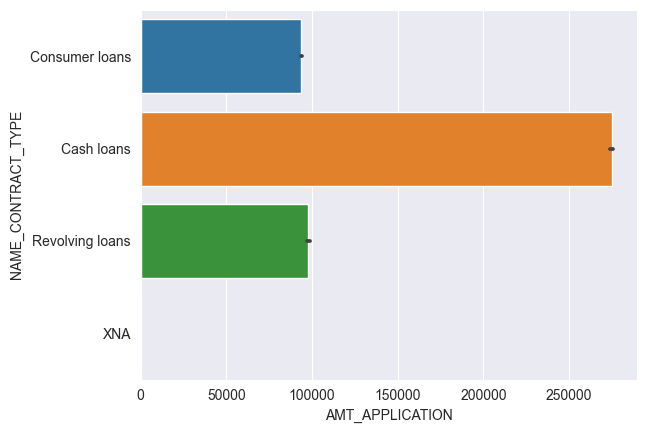

In [272]:
sns.barplot(x='AMT_APPLICATION',y='NAME_CONTRACT_TYPE',data=prev_data)

# Analysing Age and contract approval

<Axes: xlabel='DAYS_BIRTH', ylabel='count'>

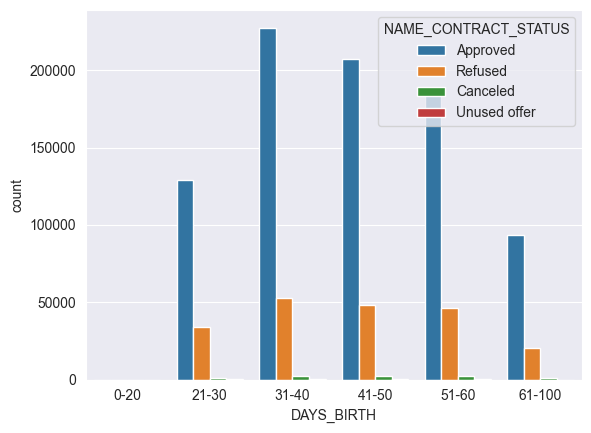

In [199]:
sns.countplot(x="DAYS_BIRTH", hue="NAME_CONTRACT_STATUS", data=merged_df)

### Observation
- Loan mostly get approved for the age band of 31 to 40.
- The second highest age band where loan gets approved is 41-5

--------------------

# Analysing family status and contract approval

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

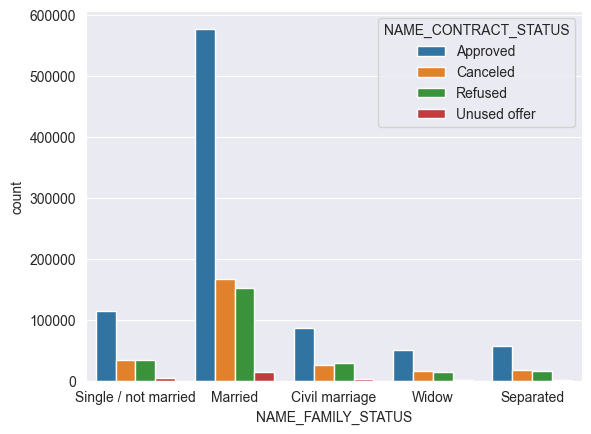

In [273]:
sns.countplot(x="NAME_FAMILY_STATUS", hue="NAME_CONTRACT_STATUS", data=merged_df)

### Observation 
- The loan gets approved mostly for married people.

-------------

# Analysing Education type and constract approval

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

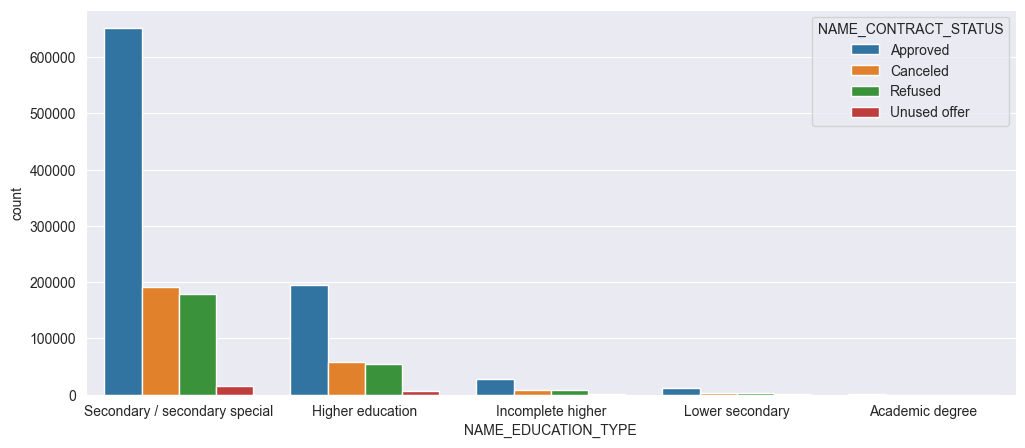

In [274]:
plt.figure(figsize=(12,5))
sns.countplot(x="NAME_EDUCATION_TYPE", hue="NAME_CONTRACT_STATUS", data=merged_df)


## Observation
- The people who are educated till secondary / secondary-special have the highest count of getting the loan approved

<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

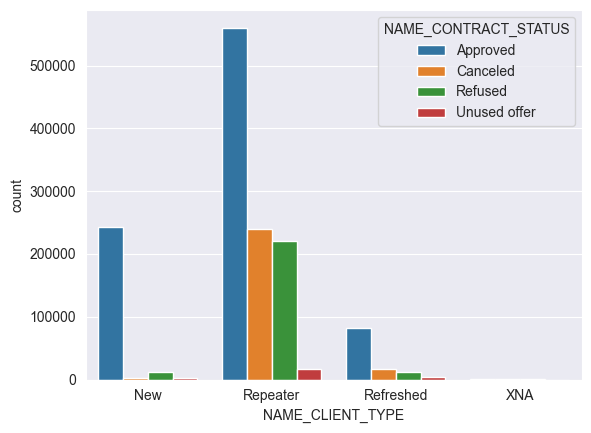

In [275]:
sns.countplot(x="NAME_CLIENT_TYPE", hue="NAME_CONTRACT_STATUS", data=merged_df)

## Observation
- Maximum applications which are approved are of the applications which are refreshed
- Which means the people who are applying for the loan maybe second/third time , their applications get approved faster.

---------

# Purpose of loan

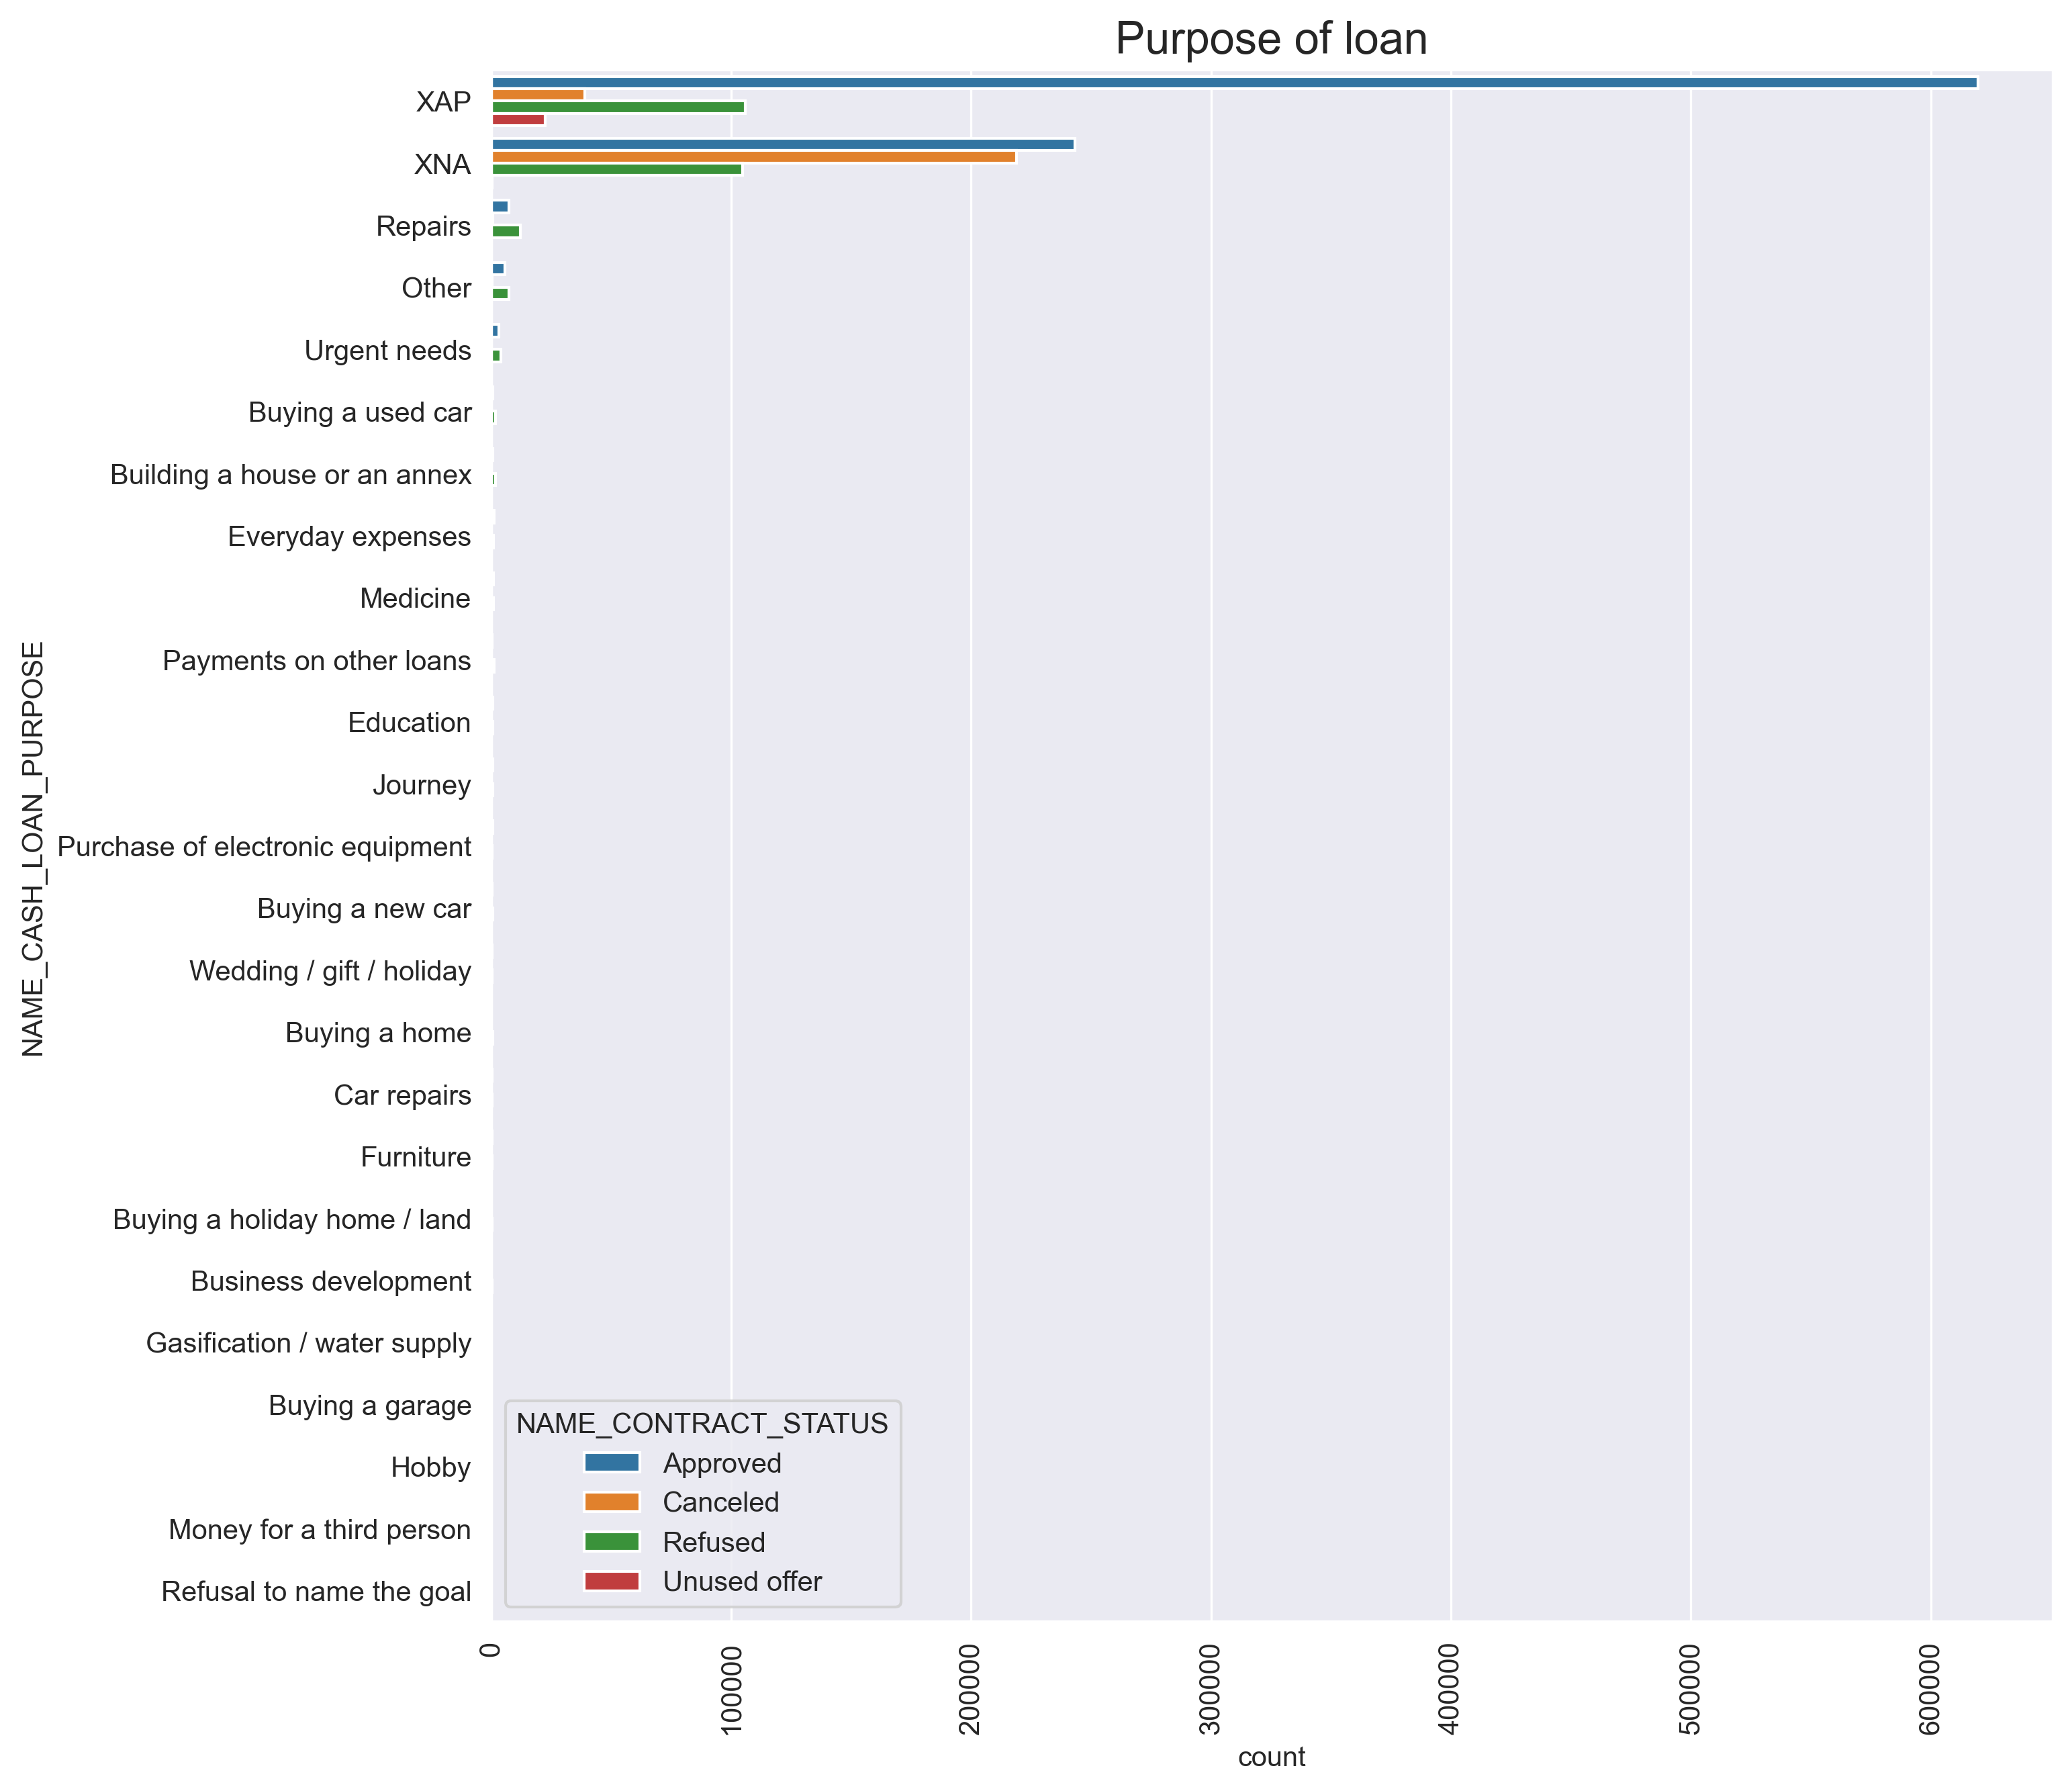

In [127]:
# Purpose of loan

plt.figure(figsize=(10,10),dpi = 300)
plt.xticks(rotation=90)
plt.title('Purpose of loan')
sns.set_style('darkgrid')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 
plt.show()

----------

# Purpose of loan with target column

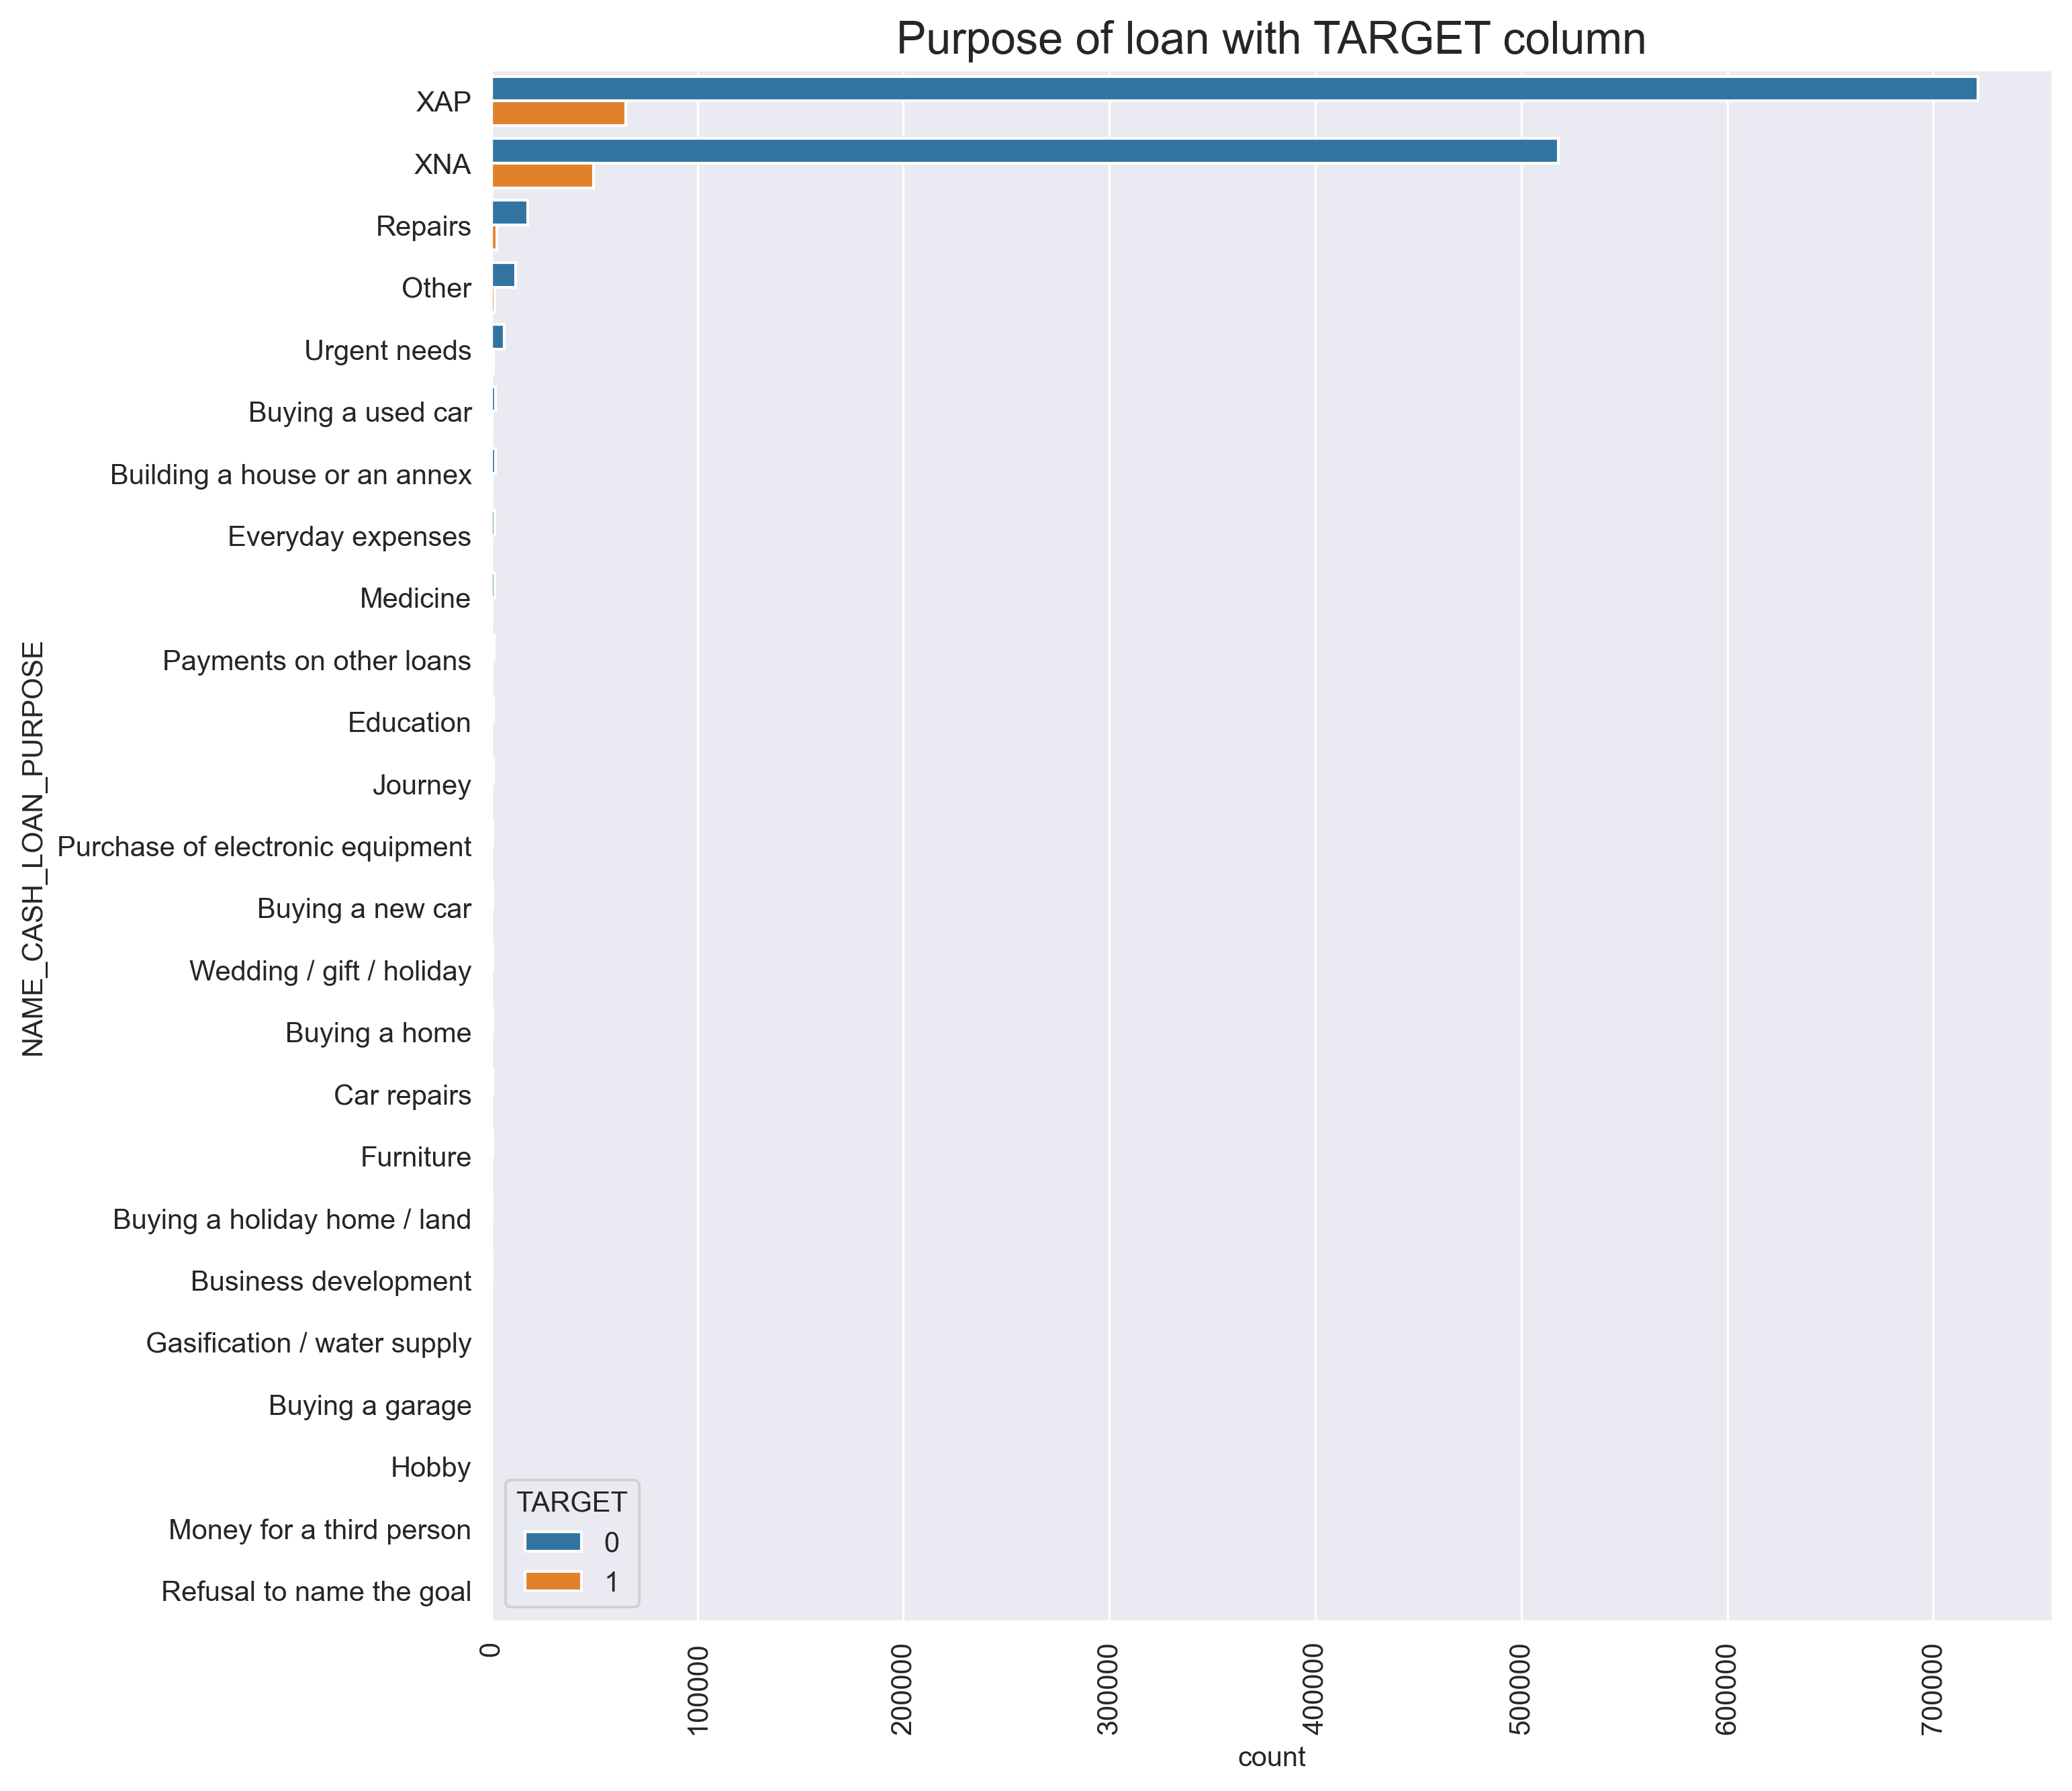

In [129]:
# Purpose of loan with TARGET column

plt.figure(figsize=(10,10),dpi = 300)
plt.xticks(rotation=90)
plt.title('Purpose of loan with TARGET column')
sns.set_style('darkgrid')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 
plt.show()

# Logistic Regression

--------------------

Selecting the categoraical columns from the merged dataframe

In [133]:
categorical_columns = merged_df.select_dtypes(include='object')
categorical_columns.columns

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE'],
      dtype='object')

In [134]:
categorical_columns = categorical_columns.drop(columns = ['NAME_CONTRACT_STATUS'])

In [135]:
categorical_columns.columns


Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y',
       'NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE'],
      dtype='object')

In [136]:
from sklearn.preprocessing import LabelEncoder


Using label encoder to use the categorical data as numeric data

In [137]:
le = LabelEncoder()


In [138]:
l1 = categorical_columns.columns


In [139]:
for i in range(len(l1)):
    categorical_columns[l1[i]] = le.fit_transform(categorical_columns[l1[i]])

In [179]:
merged_df = pd.concat([merged_df,categorical_columns],axis = 1)
merged_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE_y,NAME_CASH_LOAN_PURPOSE,CODE_REJECT_REASON,NAME_CLIENT_TYPE
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,21-30,1.0,...,6,4,3,1,8,5,1,23,7,0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,41-50,3.0,...,3,1,1,1,3,39,0,24,7,2
2,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,41-50,3.0,...,3,1,1,1,3,39,1,23,7,1
3,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,41-50,3.0,...,3,1,1,1,3,39,1,23,7,1
4,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,51-60,0.0,...,6,4,3,1,8,11,1,23,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,1,1,17,5,0,24,7,2
1413667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,1,1,17,5,0,24,7,2
1413675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,4,1,1,8,39,2,23,7,1
1413678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,3,1,3,2,1,23,1,2


Dropping columns which are not necessary

In [180]:
merged_df = merged_df.drop(columns=['NAME_CONTRACT_TYPE_x','CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y',
       'NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE'])

Dropping null values

In [160]:
merged_df = merged_df.dropna(axis = 0,how='any')


In [161]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [162]:
x_train,x_test,y_train,y_test = train_test_split(merged_df.drop(columns=['NAME_CONTRACT_STATUS','DAYS_BIRTH','DAYS_EMPLOYED'],axis = 1),merged_df['NAME_CONTRACT_STATUS'],test_size = 0.25)

In [163]:
from sklearn.linear_model import LogisticRegression


In [164]:
from sklearn.metrics import accuracy_score


In [165]:
mod = LogisticRegression().fit(x_train, y_train)

c:\Users\EXC FA1TH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [167]:
y_pred = mod.predict(x_test)


In [171]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion Matrix

In [176]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

80.44059580569179
[[206000     17   4658      0]
 [  1807      3    419      0]
 [ 44460     33   6073      0]
 [   173      0      0      0]]


# Classification Report

In [178]:
class_report = classification_report(y_test, y_pred)
print(class_report)

c:\Users\EXC FA1TH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\EXC FA1TH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Approved       0.82      0.98      0.89    210675
    Canceled       0.06      0.00      0.00      2229
     Refused       0.54      0.12      0.20     50566
Unused offer       0.00      0.00      0.00       173

    accuracy                           0.80    263643
   macro avg       0.35      0.27      0.27    263643
weighted avg       0.76      0.80      0.75    263643



c:\Users\EXC FA1TH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression Conclusion
1) Merging of two dataframes filtered_dataframe2 and prev_df
2) We have imported categorical columns into the variable categorical_columns
3) then dropped the response column from the list
4) Further we have converted categorical data using encoder.
5) We dropped the main categorical columns from main dataframe
6) Formulation of model

# Model Accuracy

In [280]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

80.44059580569179


### Result
1) We have achievd 80% Accuracy by using Logistic Regression Model.
2) Model has given 82% Precision for Approved loans and highest after that 55% for Refused Loan offer.
3) Recall value is highest for approved loan offer with 98%

### Thus we can use the Logistic Regression to effectively predict the likelihood of payment difficulties for loan applicants

----

# Conclusion from the Analysis
- Banks must target more on contract type ‘Student’ ,’Pensioner’ and ‘Businessman’ for profitable business
- Banks must focus less on income type ‘Working’ as it is has most number of unsuccessful payments in oreder to get rid of financial loss for the organization
- Clients in the age range 30-40 and 40-50
- Clients who are Married
- Clients who have education secondary/secondary special
- Repeater clients
- Clients who are male
